In [1]:
# This dataset contains information about a person like age, education and medical condition that might lead to heart disease.

In [2]:
# Description of attributes:

#Demographic:
#• Sex: male or female(Nominal)
#• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#Behavioral
#• Current Smoker: whether or not the patient is a current smoker (Nominal)
#• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#Medical( history)
#• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
#• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
#• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
#• Diabetes: whether or not the patient had diabetes (Nominal)
#Medical(current)
#• Tot Chol: total cholesterol level (Continuous)
#• Sys BP: systolic blood pressure (Continuous)
#• Dia BP: diastolic blood pressure (Continuous)
#• BMI: Body Mass Index (Continuous)
#• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
#• Glucose: glucose level (Continuous)
#Predict variable (desired target)
#• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# loading dataset:
data_file = r'C:\Users\AnitaM\Downloads\framingham.csv'
hd = pd.read_csv(data_file)

In [5]:
hd.shape

(4238, 16)

In [6]:
hd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
# The data doesnot require any additional preprocessing. The target variable is TenYearCHD.

In [8]:
# Count of how may had the Coronary heart disease given the medical condition:
hd['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [9]:
# The percentage of people having the disease is quite less than the number of people not having the disease.

In [10]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Age

In [11]:
# Check the mean age of people having and not having the disease
pivot_age = hd.pivot_table(index='TenYearCHD', values='age', aggfunc=np.mean)

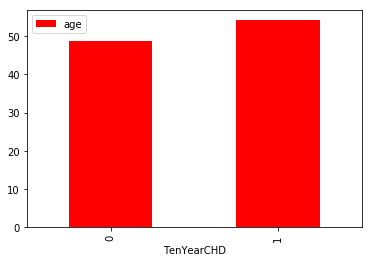

In [12]:
pivot_age.plot(kind='bar', color='red')

In [13]:
pivot_age.head()

,age
TenYearCHD,
0,48.767668
1,54.145963


In [14]:
# People with high age have more chance of having the disease

### Education

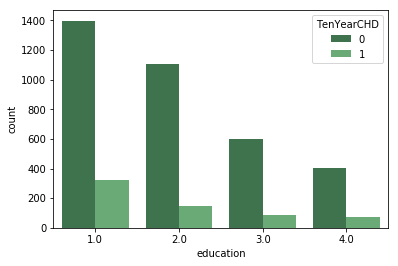

In [15]:
sns.countplot(x='education', data=hd ,hue='TenYearCHD',palette="Greens_d")

### currentSmoker

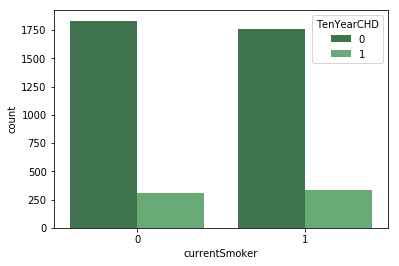

In [16]:
sns.countplot(x='currentSmoker', data=hd ,hue='TenYearCHD',palette="Greens_d")

In [17]:
# Being a current smoker doesnot have much affect on having the disease 

### cigsPerDay 

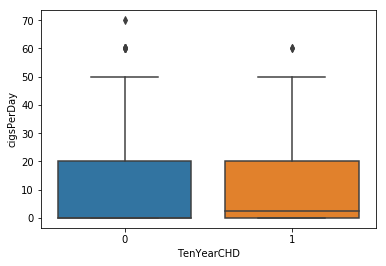

In [18]:
sns.boxplot(y='cigsPerDay', x='TenYearCHD', data=hd)

In [19]:
# Check the mean cigsPerDay of people having and not having the disease
pivot_cigs_per_day = hd.pivot_table(index='TenYearCHD', values='cigsPerDay', aggfunc=np.median) # Taking median as the data contains outliers

In [20]:
pivot_cigs_per_day

,cigsPerDay
TenYearCHD,
0,0.0
1,2.5


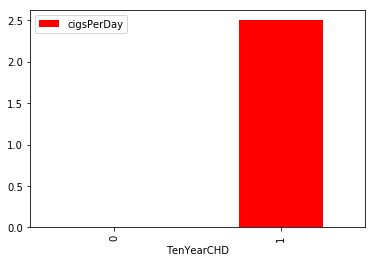

In [21]:
pivot_cigs_per_day.plot(kind='bar', color='red')

In [22]:
# People who were likely to develop the disease smoked 2-3 cigs per day

### BPMeds

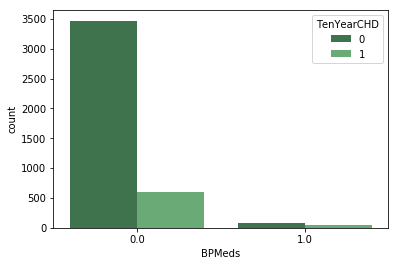

In [23]:
sns.countplot(x='BPMeds', data=hd ,hue='TenYearCHD',palette="Greens_d")

### prevalentStroke

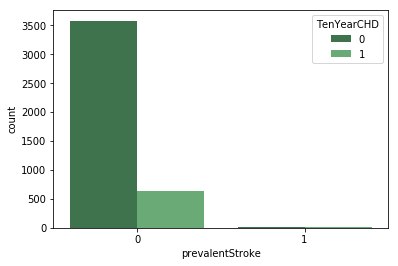

In [24]:
sns.countplot(x='prevalentStroke', data=hd, hue='TenYearCHD', palette="Greens_d")

In [25]:
# People who did not had stoke in the past most likely didnot had the disease

### prevalentHyp 

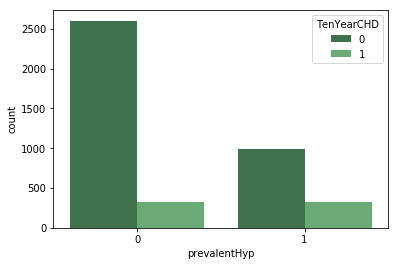

In [26]:
sns.countplot(x='prevalentHyp', data=hd, hue='TenYearCHD', palette="Greens_d")

In [27]:
# Being hypertensive does not necessarily increase the change of getting the disease as 
# the ratio of not having the disease is more given the hypertensive coondition

### diabetes

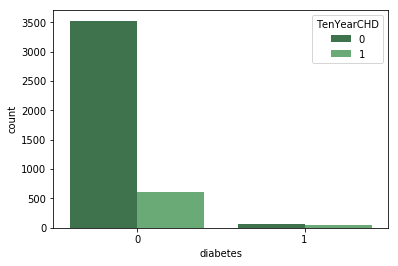

In [28]:
sns.countplot(x='diabetes', data=hd, hue='TenYearCHD', palette='Greens_d')

### totChol

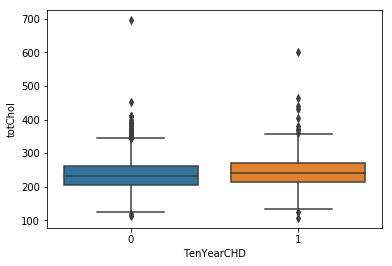

In [29]:
sns.boxplot(y='totChol', x='TenYearCHD', data=hd)

In [30]:
# Check the median total cholestrol of people having and not having the disease
pivot_totChol = hd.pivot_table(index='TenYearCHD', values='totChol', aggfunc=np.median) # Taking median as the data contains outliers

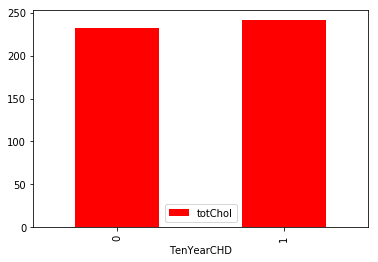

In [31]:
pivot_totChol.plot(kind='bar', color='red')

In [32]:
# Values almost same for both having and not having disease
pivot_totChol

,totChol
TenYearCHD,
0,232.0
1,241.0


### sysBP

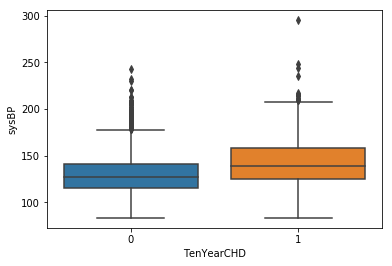

In [33]:
sns.boxplot(y='sysBP', x='TenYearCHD', data=hd)

In [34]:
# Check the median systolic BP of people having and not having the disease
pivot_sysBP = hd.pivot_table(index='TenYearCHD', values='sysBP', aggfunc=np.median) # Taking median as the data contains outliers

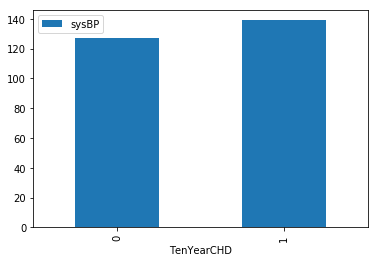

In [35]:
pivot_sysBP.plot(kind='bar')

### diaBP

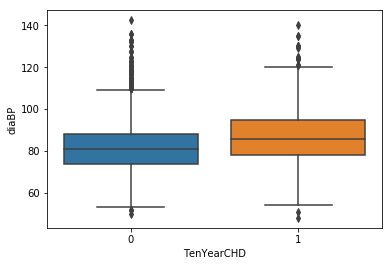

In [36]:
sns.boxplot(y='diaBP', x='TenYearCHD', data=hd)

In [37]:
# Check the median diastolic BP of people having and not having the disease
pivot_diaBP = hd.pivot_table(index='TenYearCHD', values='diaBP', aggfunc=np.median) # Taking median as the data contains outliers

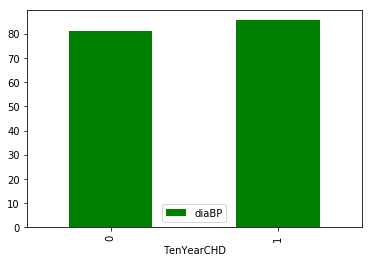

In [38]:
pivot_diaBP.plot(kind='bar', color='green')

### BMI

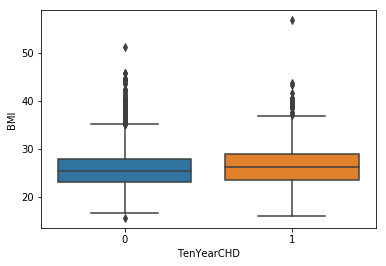

In [39]:
sns.boxplot(y='BMI', x='TenYearCHD', data=hd)

In [40]:
# Check the median BMI of people having and not having the disease
pivot_BMI = hd.pivot_table(index='TenYearCHD', values='BMI', aggfunc=np.median) # Taking median as the data contains outliers

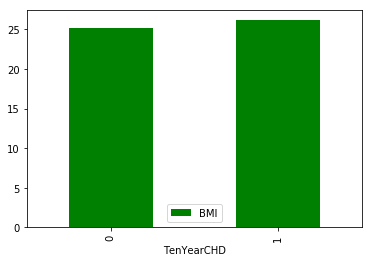

In [41]:
pivot_BMI.plot(kind='bar', color='green')

### heartRate

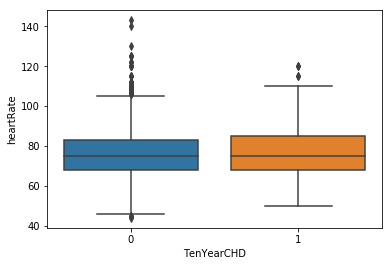

In [42]:
sns.boxplot(y='heartRate', x='TenYearCHD', data=hd)

In [43]:
# Check the median heart rate of people having and not having the disease
pivot_heartRate = hd.pivot_table(index='TenYearCHD', values='heartRate', aggfunc=np.median) # Taking median as the data contains outliers

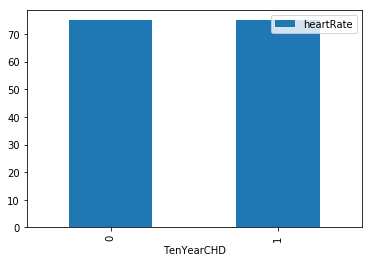

In [44]:
pivot_heartRate.plot(kind='bar')

### glucose

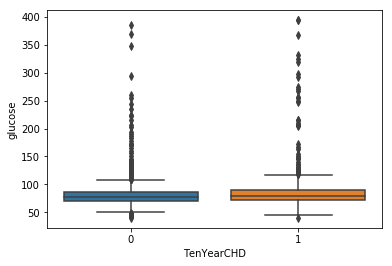

In [45]:
sns.boxplot(y='glucose', x='TenYearCHD', data=hd)

In [46]:
# Check the median glucose of people having and not having the disease
pivot_glucose = hd.pivot_table(index='TenYearCHD', values='glucose', aggfunc=np.median) # Taking median as the data contains outliers

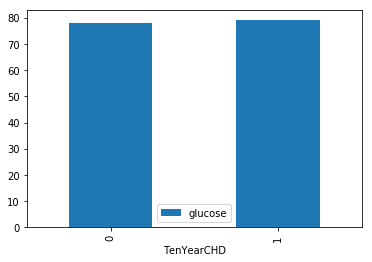

In [47]:
pivot_glucose.plot(kind='bar')

C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


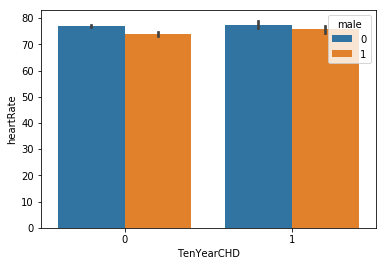

In [48]:
# Looking at heartrate, gender and target variable:
sns.barplot(x='TenYearCHD', y='heartRate',hue='male',data=hd)

In [49]:
# Check for NAs:
hd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [50]:
hd['education'].fillna(hd['education'].median(), inplace=True)
hd['cigsPerDay'].fillna(hd['cigsPerDay'].median(), inplace=True)
hd['totChol'].fillna(hd['totChol'].median(), inplace=True)
hd['BMI'].fillna(hd['BMI'].median(), inplace=True)
hd['heartRate'].fillna(hd['heartRate'].median(), inplace=True)
hd['glucose'].fillna(hd['glucose'].median(), inplace=True)

In [51]:
hd.dropna(inplace=True)

In [52]:
hd.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [53]:
# splitting the numerical and categorical features to see the relation between using ANOVA and Chi-squared
num_var = hd[['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
cat_var = hd[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

In [54]:
num_var.head()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,3.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0


In [55]:
cat_var.head()

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,0,0.0,0,0,0
1,0,0,0.0,0,0,0
2,1,1,0.0,0,0,0
3,0,1,0.0,0,1,0
4,0,1,0.0,0,0,0


In [56]:
# Using Chi-Squared test for cat variables:
from sklearn.feature_selection import chi2
chi2_values, p_values_chi = chi2(cat_var, hd['TenYearCHD'])

In [57]:
print(list(zip(cat_var.columns, np.round(chi2_values,2), np.round(p_values_chi,2))))

[('male', 20.05, 0.0), ('currentSmoker', 0.93, 0.33), ('BPMeds', 31.08, 0.0), ('prevalentStroke', 13.17, 0.0), ('prevalentHyp', 90.01, 0.0), ('diabetes', 37.9, 0.0)]


In [58]:
# Using ANOVA(f_classif) for numerical variables:
from sklearn.feature_selection import f_classif
f_values, p_values_f = f_classif(num_var, hd['TenYearCHD'])

In [59]:
print(list(zip(num_var.columns, np.round(f_values,2), np.round(p_values_f,2))))

[('age', 220.79, 0.0), ('education', 12.36, 0.0), ('cigsPerDay', 15.1, 0.0), ('totChol', 24.2, 0.0), ('sysBP', 205.26, 0.0), ('diaBP', 92.87, 0.0), ('BMI', 24.69, 0.0), ('heartRate', 2.43, 0.12), ('glucose', 61.15, 0.0)]


In [63]:
cat = cat_var 

In [64]:
cat.head()

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,0,0.0,0,0,0,0
1,0,0,0.0,0,0,0,0
2,1,1,0.0,0,0,0,0
3,0,1,0.0,0,1,0,1
4,0,1,0.0,0,0,0,0


In [68]:
from scipy import stats

In [66]:
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat.columns
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['TenYearCHD'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

C:\Users\AnitaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:2933: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw
C:\Users\AnitaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<module 'matplotlib.pyplot' from 'C:\\Users\\AnitaM\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

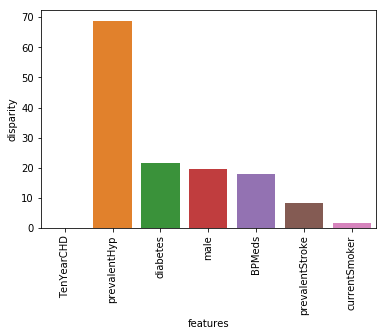

In [69]:
cat_var['TenYearCHD'] = hd.TenYearCHD.values
k = anova(cat_var) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

In [70]:
# As per the disparity score calculated from the p-value of anova test; prevalentHyp seems to be the most important feature